# Introduction

We see the stock market almost every day. Whether you like it or not, stock is important to the economy. As computer scientists, or data science enthusiasts, we should be aware of these changes in stock. Because we are smart, and because we have a knack for hacking and breaking and reordering things to understand them, then we should take a crack at understanding how stocks work. This tutorial will dive into that.

You see this example of a normal, every-day stock from ImmunoGen, Inc.

![GitHub Logo](sample_stock_image.png)

However, what can we truly gain from this? Yeah, a company is making money, but what do I care? With a little bit of data science and analysis, you can see why stocks are a hot topic for data analytics, as people try to predict where the stock will go, or when the best time is to buy and sell stocks.

In this tutorial, we will be teaching you how to clean up data on stocks, and how to do effective analysis on specific trends in stocks. After introducing the material and libraries you will need for this python project, we will dive into how to download the data you need from a website that collects stock data. Given that most available stock websites are limited, we will show you one example with opening and closing stocks, and then we will show you stock data that is more concise.
After we go through the uploading practices, we will go through how to clean up this specific data, and what you should expect. From there, we will do some analysis on the data we collected.

In this tutorial, we will first be analyzing five different biomedical stocks, and determining if any outside factors affected those stock's increases or decreases. We will then be analyzing when the best time is to buy a stock from these companies, analyzing the times throughout the same week for these companies.

### Order of Topics
- [Setup Your Python](#Setup-Your-Python)
- [Getting Data](#Getting-Data)
- [Loading and Cleaning Data](#Loading-and-Cleaning-Data)
- [Focusing the Data for Comprehension](#Focusing-the-Data-for-Comprehension)
- [Plotting Data](#Plotting-Data)
- [Merging Multiple Data Sets](#Merging-Multiple-Data-Sets)
- [Introduction to Analysis](#Introduction-to-Analysis)
- [Analyzing our Stocks](#Analyzing-our-Stocks)
- [Effects of Company Events on Stock](#Effects-of-Company-Events-on-Stock)
- [Bigger Data Set](#Bigger-Data-Set)
- [Analyzing our Bigger Data Set](#Analyzing-our-Bigger-Data-Set)
- [Final Conclusions](#Final-Conclusions)
- [Helpful Links](#Helpful-Links)

Let's get hacking!

***

# Setup Your Python

In order to clean data and analyze the stocks, we need to format the data so that we can do cool things to it. Let's start out with the first python library we need to import!

`import pandas as pd`

With this library, we will be able to load information that we have gathered into readable tables in the form of dataframes. Dataframes can be easily cleaned, analyzed, and with a little bit of flare, can make your life a whole lot easier!

In order to plot stocks like we would find on any stock market website, we need to be able to plot all the points onto a graoh. In order to do this, we will import matplotlib.

`import matplotlib.pyplot as plt`

Matplotlib is a great source for all your graphical element needs. Because Matplotlib works hand in hand with pandas, it is very easy to just put our data straight from our data and into the graph.

Our next library to import will help us with sorting our data. Because most stock data needs to be analyzed based on time, and most data that we receive is in the form of text, we need to be able to convert dates to an object that can be analyzed without erroneous parsing. To do this, we will import datetime.

`import datetime as dt`

Now that we have all the imports we need, let's get started on collecting our data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Getting Data
[Nasdaq][stockwebsite1] website.

This website provides up to 10 years of daily historical stock prices and volumes for each stock. We will be using this website to download the opening, closing, volume, high, and low prices for each equity we are interested in. Right now, we are interested in four different companies:

- [Exelixis, Inc. (EXEL)](https://www.exelixis.com/)
- [ImmunoGen, Inc. (IMGN)](http://www.immunogen.com/)
- [Immunomedics, Inc. (IMMU)](https://immunomedics.com/)
- [Inovio (INO)](https://www.inovio.com/)

We will walk you through step-by-step how to get this data in the form of a CSV or TSV so that we can analyze it.

[stockwebsite1]: http://www.nasdaq.com/quotes/historical-quotes.aspx

### Step 1
- Go to the Nasdaq website listed above.
- Type in which company you'd like to query data from (in our case, we chose EXEL).
- Press "Submit"

### Step 2
- Step 1 will bring you to a recent stock prices page. It includes all the opening and closing prices, as well as the most recent closing time (16:00 time).
- Click on the dropdown menu next to "Select the Timeframe," and choose what you like. We chose 10 Years.
- A table of all the values you want is displayed in this timeframe. Scroll to the bottom.

### Step 3
- Click on the link that says "Download this file in Excel Format" in the lower right hand corner of the text box.
- The download screen should pop up. Instead of saving as an excel document, though, save as the following:
- *NAME*HistoricalText*.tsv*
- This saves the file in TSV-form, which stands for Tab-Separated Values, an example of delimiter-sepatated values.
- Use the directory where you saved the .tsv file for the following uploads.

And there you have it! You have a data set. Now, time to get a working data frame from it.

# Loading and Cleaning Data

Here we will actually load our data, and do some cleaning to make it easier to comprehend and analyze.

In [3]:
# make a variable representing the dataframe you are creating with 
# the data you just downloaded
EXEL = pd.read_csv("EXELHistoricalPrices.tsv", sep='\t')
EXEL.head()

,date,close,volume,open,high,low
0,16:00,26.42,"2,103,344",27.29,27.29,26.37
1,12/11/2017,26.42,2103344,27.29,27.29,26.37
2,12/8/2017,27.11,1995575,27.19,27.55,26.96
3,12/7/2017,26.90,1200894,26.35,27.19,26.11
4,12/6/2017,26.22,2424149,26.73,26.94,25.56


This data looks a little bit dirty, though! It seems that it saves the last closing time recorded, and duplicates it on the most recent level. It also appears to have dates, but they are not in the proper datetime useful for python coding. Let's change this up with these next lines!

`drop` is a pandas command that will drop the row or column specified.

`reset_index()` resets all the indices so that we start from 0 again, for better computation.

Let's look at what happens when we just use this.

In [4]:
EXEL.drop(EXEL.index[0], inplace=True)
EXEL = EXEL.reset_index()
EXEL.head()

,index,date,close,volume,open,high,low
0,1,12/11/2017,26.42,2103344,27.29,27.29,26.37
1,2,12/8/2017,27.11,1995575,27.19,27.55,26.96
2,3,12/7/2017,26.90,1200894,26.35,27.19,26.11
3,4,12/6/2017,26.22,2424149,26.73,26.94,25.56
4,5,12/5/2017,26.73,2007140,27.44,28.10,26.67


It looks like it removed the first row, but it included the old indices when we reset the values. Let's get rid of that column, and then also change the dates using `to_datetime` from pandas.

In [5]:
EXEL.drop('index', axis=1, inplace=True)
EXEL['date'] = pd.to_datetime(EXEL['date'])
EXEL.head()

,date,close,volume,open,high,low
0,2017-12-11,26.42,2103344,27.29,27.29,26.37
1,2017-12-08,27.11,1995575,27.19,27.55,26.96
2,2017-12-07,26.90,1200894,26.35,27.19,26.11
3,2017-12-06,26.22,2424149,26.73,26.94,25.56
4,2017-12-05,26.73,2007140,27.44,28.10,26.67


Perfect! The dates are now in datetime format, and there are no extraneous rows or columns. Let's do this for the rest of the data that we have collected, and move on to visualizing the data we collected.

In [6]:
IMGN = pd.read_csv("IMGNHistoricalPrices.tsv", sep='\t')
IMGN.drop(IMGN.index[0], inplace=True)
IMGN = IMGN.reset_index()
IMGN.drop('index', axis=1, inplace=True)
IMGN['date'] = pd.to_datetime(IMGN['date'])

IMMU = pd.read_csv("IMMUHistoricalPrices.tsv", sep='\t')
IMMU.drop(IMMU.index[0], inplace=True)
IMMU = IMMU.reset_index()
IMMU.drop('index', axis=1, inplace=True)
IMMU['date'] = pd.to_datetime(IMMU['date'])

INO = pd.read_csv("INOHistoricalPrices.tsv", sep='\t')
INO.drop(INO.index[0], inplace=True)
INO = INO.reset_index()
INO.drop('index', axis=1, inplace=True)
INO['date'] = pd.to_datetime(INO['date'])

# Focusing the Data for Comprehension

`len(DATA)` returns the length of the dataframe, which in this case is the number of rows of data.

In [7]:
len(EXEL)

2519

'How much data are we processing?' - we might ask ourselves. Above, we see that EXEL has listed 2,519 row entries in its dataframe. That may not seem like a lot of data in the grand scheme of data analysis, (and in fact, it is a good amount for good analysis) but for visualization of our data, it might get a bit muddled.

We can cut down on the amount of data we are viewing by the date, to make it so that we are only viewing the most recent data. We queried for these values on December 11th, 2017, so we are going to see if we can get only the stock information from the past month.

`DATA.copy()` makes a copy of a dataframe that was previously computed. We do this so that we do not edit the original dataframe if we need it later.

`smallDATA['date']` gets the column from the dataframe *smalldata*, and represents it as a panda series.

`smallDATA[smallDATA['date'] >= 'YYYY-MM-DD']` sets the previous date column to only the dates that are after the date we specify.

Because this sets the dates of those that do not qualify equal to NaT (or, Not-A-Time), we must remove those. We can remove those rows with `smallDATA[pd.notnull{smallDATA['date'])]`.

We want to get rid of the seconds that also are added when we cut the dates down. We cut off the extra '00:00:00' time by running `smallDATA['date'].map(lambda t: t.strftime('%Y-%m-%d'))`. This will enact a specific formula across all parts of a pandas series. In other terms, it uses the MAP part of MAPREDUCE, if you are familiar with Hadoop or OCaml, to implement a function across all parts of a data series.

We will display this data in full so that you can see how much smaller this dataframe is.

In [8]:
# Looking a little more closely at the data!
smallEXEL = EXEL.copy()
smallEXEL
smallEXEL['date'] = smallEXEL[smallEXEL['date'] >= '2017-11-11']
smallEXEL = smallEXEL[pd.notnull(smallEXEL['date'])]
smallEXEL['date'] = smallEXEL['date'].map(lambda t: t.strftime('%Y-%m-%d'))
smallEXEL['date'] =  pd.to_datetime(smallEXEL['date'])
smallEXEL

,date,close,volume,open,high,low
0,2017-12-11,26.42,2103344,27.29,27.29,26.3700
1,2017-12-08,27.11,1995575,27.19,27.55,26.9600
2,2017-12-07,26.90,1200894,26.35,27.19,26.1100
3,2017-12-06,26.22,2424149,26.73,26.94,25.5600
4,2017-12-05,26.73,2007140,27.44,28.10,26.6700
5,2017-12-04,27.57,2453071,28.40,28.88,27.5150
6,2017-12-01,28.12,4156049,27.07,28.43,26.7400
7,2017-11-30,27.08,1904153,26.25,27.10,26.1419
8,2017-11-29,26.10,2285658,27.00,27.19,25.9500
9,2017-11-28,27.01,2642426,26.43,27.04,26.0600


We'll use this technique later when we really want to get into zooming in on our data!

# Plotting Data

Now we have gotten to the part of this tutorial where stock information acutally looks like stocks! Let's check out some really cool ways to represent data frames as graphs, and different visualization styles.

First, we must specify that we will be using the `matplotlib.plt` library to plot everything onto graphs. This is a very useful and easy tool for good visualizations.

First, we should specify some commands for `matplotlib`.

`plot` will put the first argument on the x-axis, the second argument on the y-axis, and has many more different variables to choose from after that. I chose to use `color` to differentiate between our different types of data.

`plot.title` labels the graph, `plot.xlabel` and `plot.ylabel` label the x and y axis.

It's kind of difficult to visualize what the high data and low data means for a specific time period of stock fluctuations. If we plot them both, we have a better idea of the volatility of the stock, as well as the disparity between the highs of the day and the lows of the day. Let's plot them out below.

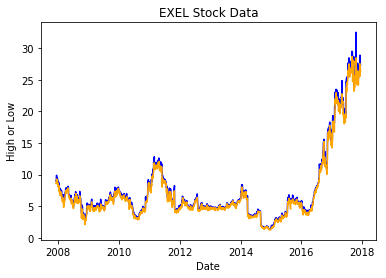

In [9]:
plotEXEL = EXEL[['date', 'high', 'low']]
plt.plot(plotEXEL['date'], plotEXEL['high'], color='blue')
plt.plot(plotEXEL['date'], plotEXEL['low'], color='orange')
plt.title('EXEL Stock Data')
plt.xlabel("Date")
plt.ylabel("High or Low")
plt.show()

Wait a minute, this data looks too small! Let's make it a bit larger using `plt.rcParams`. There are multiple different parameters you can use when visualizing the data. I like making my graphs extra large, so from here I will use these settings:

In [10]:
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["legend.fontsize"] = 'x-large'
plt.rcParams["axes.labelsize"] = 'x-large'
plt.rcParams["axes.titlesize"] = 'x-large'
plt.rcParams["xtick.labelsize"] = 'x-large'
plt.rcParams["ytick.labelsize"] = 'x-large'

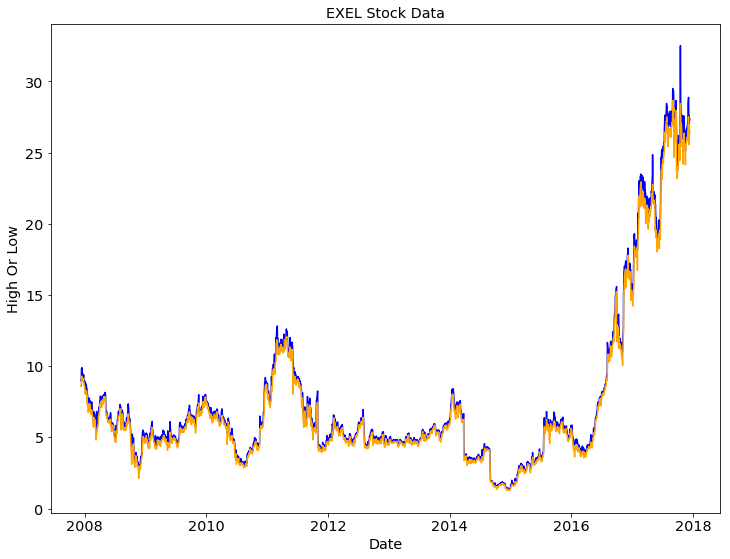

In [11]:
plt.plot(plotEXEL['date'], plotEXEL['high'], color='blue')
plt.plot(plotEXEL['date'], plotEXEL['low'], color='orange')
plt.title('EXEL Stock Data')
plt.xlabel("Date")
plt.ylabel("High Or Low")
plt.show()

This looks like a lot of data, though. How would we know if our analysis is right if we can't zoom in on the dates?

Ah, I see you were quick to catch on! Yes, we will use our previously computed small data model to view the stocks up close depending on what days we need it. Let's just view the last month's worth of stock, shall we?

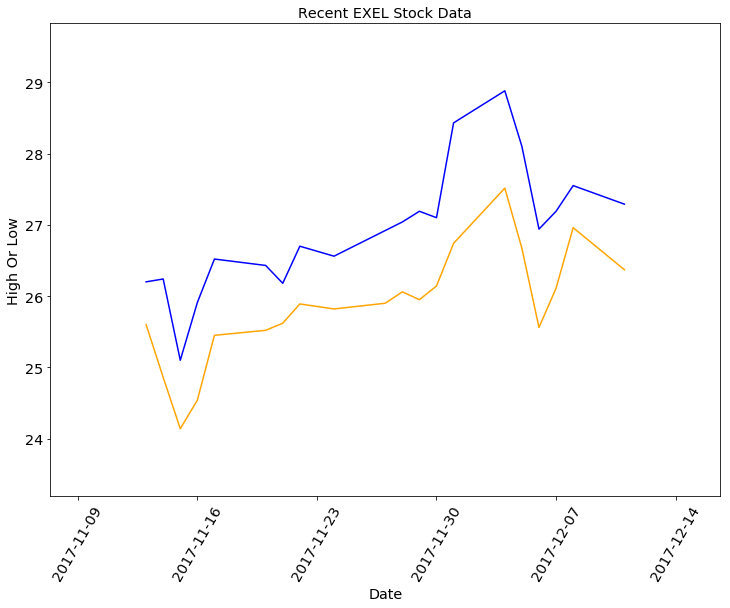

In [12]:
plotsmallEXEL = smallEXEL[['date', 'high', 'low']]
plt.plot(plotsmallEXEL['date'], plotsmallEXEL['high'], color='blue')
plt.plot(plotsmallEXEL['date'], plotsmallEXEL['low'], color='orange')

plt.title('Recent EXEL Stock Data')
plt.xlabel("Date")
plt.ylabel("High Or Low")
plt.xticks(rotation=60)
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()

# Merging Multiple Data Sets

If we wanted to, we could put all of this data together on one single dataframe so we don't have to keep track of more than one dataframe. We can also use this to compare how well stocks have done from multiple different companies. Let's look into how we can merge this data together so that we can have a conglomerate dataframe.

Because we can see all the other data frames just by printing them, we don't need to go into the details of what they look like. For now, let's worry about putting everything together. In order to sort the data later by company, we will create a column that has the stock symbol as its value.

In [13]:
EXEL['name'] = 'EXEL'
EXEL.head()

,date,close,volume,open,high,low,name
0,2017-12-11,26.42,2103344,27.29,27.29,26.37,EXEL
1,2017-12-08,27.11,1995575,27.19,27.55,26.96,EXEL
2,2017-12-07,26.90,1200894,26.35,27.19,26.11,EXEL
3,2017-12-06,26.22,2424149,26.73,26.94,25.56,EXEL
4,2017-12-05,26.73,2007140,27.44,28.10,26.67,EXEL


Great! Let’s do it for all the others.

In [14]:
IMGN['name'] = 'IMGN'
IMMU['name'] = 'IMMU'
INO['name'] = 'INO'

We can bring the code together by concatenating all the dataframes, using `pd.concat(frames)`. This allows us to stack the data frames on top of each other. From here, we can sort the data using `DATA.sort_values()` to sort by date, and then name.

In [15]:
frames = [EXEL, IMGN, IMMU, INO]

DATA = pd.concat(frames)
DATA = DATA.reset_index()
DATA.drop('index', axis=1, inplace=True)

In [16]:
DATA = DATA.sort_values(by=['date', 'name'], ascending=[False, True])
DATA = DATA.reset_index()
DATA.drop('index', axis=1, inplace=True)
DATA.head()

,date,close,volume,open,high,low,name
0,2017-12-11,26.42,2103344,27.29,27.29,26.370,EXEL
1,2017-12-11,6.18,2567119,6.26,6.54,6.170,IMGN
2,2017-12-11,12.35,3628515,12.58,13.03,12.260,IMMU
3,2017-12-11,4.50,855838,4.50,4.62,4.485,INO
4,2017-12-08,27.11,1995575,27.19,27.55,26.960,EXEL


Looks like we're on the right track! Now, if we wanted to ask for specific data, like what the stock prices were on a specific day or in between dates, we can get it using previous techniques like below.

In [17]:
tempDate = DATA[DATA['date'] == '2008-12-12']
tempDate

,date,close,volume,open,high,low,name
7679,2008-12-12,4.95,5316096,4.5,5.00,4.0,EXEL
7680,2008-12-12,4.01,324126,3.9,4.10,3.8,IMGN
7681,2008-12-12,1.61,116621,1.5,1.61,1.5,IMMU


Let's try plotting all this data now. We'll be using the DATA dataframe, and plotting like we had above, but this time going by name.

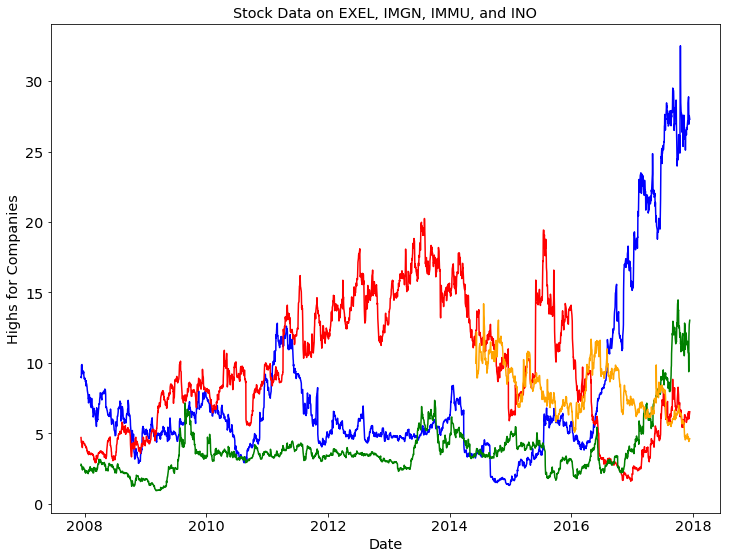

In [18]:
plotDATA = DATA[['date', 'high', 'name']]

plotEXEL = plotDATA[plotDATA['name'] == 'EXEL']
plotIMGN = plotDATA[plotDATA['name'] == 'IMGN']
plotIMMU = plotDATA[plotDATA['name'] == 'IMMU']
plotINO = plotDATA[plotDATA['name'] == 'INO']

plt.plot(plotEXEL['date'], plotEXEL['high'], color='blue')
plt.plot(plotIMGN['date'], plotIMGN['high'], color='red')
plt.plot(plotIMMU['date'], plotIMMU['high'], color='green')
plt.plot(plotINO['date'], plotINO['high'], color='orange')
plt.title('Stock Data on EXEL, IMGN, IMMU, and INO')
plt.xlabel("Date")
plt.ylabel("Highs for Companies")
plt.show()

If we wanted to zoom in on this data, let's say from the past year, we could use our small plot techniques from above.

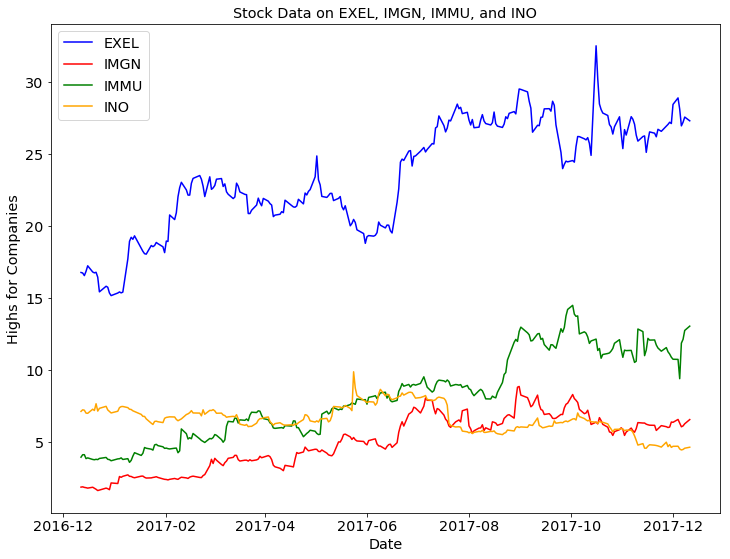

In [19]:
plotDATA = DATA[['date', 'high', 'name']]

plotEXEL = plotDATA[plotDATA['name'] == 'EXEL']
plotEXEL = plotEXEL[plotEXEL['date'] >= '2016-12-11']
plotIMGN = plotDATA[plotDATA['name'] == 'IMGN']
plotIMGN = plotIMGN[plotIMGN['date'] >= '2016-12-11']
plotIMMU = plotDATA[plotDATA['name'] == 'IMMU']
plotIMMU = plotIMMU[plotIMMU['date'] >= '2016-12-11']
plotINO = plotDATA[plotDATA['name'] == 'INO']
plotINO = plotINO[plotINO['date'] >= '2016-12-11']

plt.plot(plotEXEL['date'], plotEXEL['high'], color='blue', label='EXEL')
plt.plot(plotIMGN['date'], plotIMGN['high'], color='red', label='IMGN')
plt.plot(plotIMMU['date'], plotIMMU['high'], color='green', label='IMMU')
plt.plot(plotINO['date'], plotINO['high'], color='orange', label='INO')
plt.title('Stock Data on EXEL, IMGN, IMMU, and INO')
plt.xlabel("Date")
plt.ylabel("Highs for Companies")
plt.legend(loc='upper left')
plt.show()

So this information looks like something that we can analyze. While previous data might have been hard to get a good grasp on, we can easily see a trend occuring over the past few years. We will be using this smaller data set of the past two years to not only include INO, which happens to not have any data prior to 2014, but also to dive into regression analysis.

# Introduction to Analysis

There are many different ways in which to analyze stock. One of my favorites is just a simple linear regression analysis, considering most of these stock graphs look like they can have a line of best fit. Let's look into first, doing a linear regression analysis on these data sets, and then fitting a linear regression model onto each plot.

First, we start off with the linear regression analysis. We will be doing this by focusing on the high data for simplicity. You can change this to be the low, or the opening price for the day to fit your comfort.

In order to do this, we will use the smaller data set from the last graph for EXEL to introduce the idea of linear regression analysis, and then do it for the rest of our data.

In [20]:
linEXEL = DATA[DATA['name'] == 'EXEL']
linEXEL = linEXEL[linEXEL['date'] >= '2016-12-11']
linEXEL = linEXEL.reset_index()
linEXEL.drop('index', axis=1, inplace=True)

We need to import `sklearn`, and from there, `LinearRegression`, in order to produce a line of best fit for our graph later.

To get an array of our date values from `linEXEL`, we have to use `numpy`. `numpy` is a great tool in order to do do quick list tasks in python, like iteration, mapping, or searching.

In [21]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np

In order to predict where we think the stocks may go in the future, we would want to use a linear regression model, or simply put, a line of best fit. By doing this, we can calculate a near future price for the stock, which, if we know the projected price, would be beneficial for our wallets. Let's look at a basic linear regression calculation. This one uses `linear_model.LinearRegression()` for its analysis, and `numpy` to iterate over the dates.

Dates are a tricky think in Data Science, though. They make for good analysis in between dates, but not much else. So, we need to convert the dates in this dataset into their numerical value.

In [22]:
linEXEL['num_date'] = pd.to_datetime(linEXEL['date'])
linEXEL['num_date'] = linEXEL['num_date'].map(dt.datetime.toordinal)

In [23]:
reglineEXEL = linear_model.LinearRegression()
linEXEL_x = np.array([[y] for y in linEXEL['num_date']])
linEXEL_y = linEXEL['high']
reglineEXEL.fit(linEXEL_x, linEXEL_y)
reglineEXEL.coef_[0]

0.030013476840880422

So our stock is increasing consistently at a rate of 3%. While that may not be much, let's plot this out on a graph and see if it's the same.

In [24]:
# Regression line
m, b = np.polyfit(linEXEL['num_date'], linEXEL['high'], 1)

By plotting down the regression line with the x-axis as date, you don't run into any troubles of it being computed by a numerical date format.

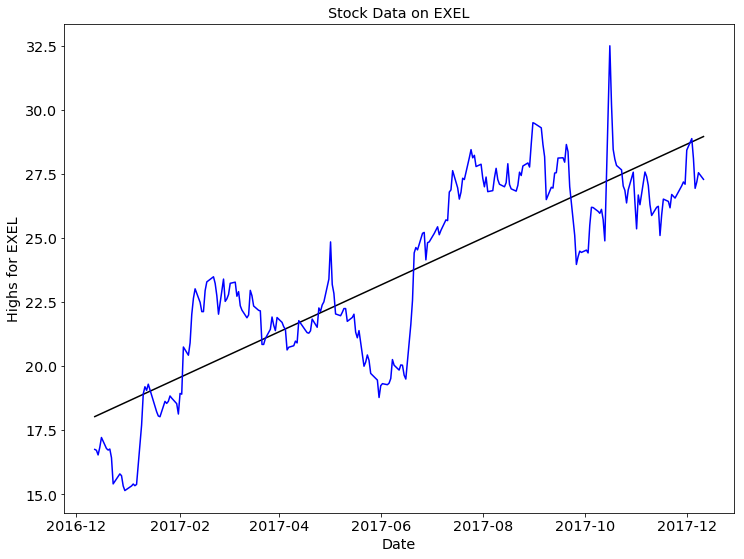

In [25]:
plt.plot(linEXEL['date'], m*(linEXEL['num_date']) + b, '-', color = "black")

plt.plot(linEXEL['num_date'], linEXEL['high'], color='blue')
plt.title('Stock Data on EXEL')
plt.xlabel("Date")
plt.ylabel("Highs for EXEL")
plt.show()

Just to reiterate that the above computation of the linear regression line was correct when using `linear_model.LinearRegression()`, we print below what the slope of the line of best fit is in the graph above. Since they are the same, we computed both values correctly, and we now have two different ways to compute our prediction for our stocks.

In [26]:
print(m)

0.0300134768409


# Analyzing our Stocks

Let's go ahead and fit a line of best fit to the rest of our data.

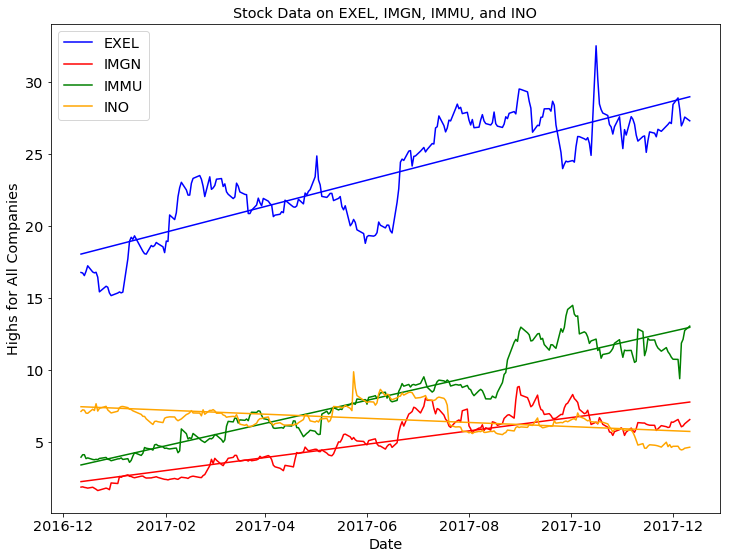

In [27]:
linEXEL = DATA[DATA['name'] == 'EXEL']
linEXEL = linEXEL[linEXEL['date'] >= '2016-12-11']
linEXEL = linEXEL.reset_index()
linEXEL.drop('index', axis=1, inplace=True)
linEXEL['num_date'] = pd.to_datetime(linEXEL['date'])
linEXEL['num_date'] = linEXEL['num_date'].map(dt.datetime.toordinal)
m_EXEL, b_EXEL = np.polyfit(linEXEL['num_date'], linEXEL['high'], 1)
plt.plot(linEXEL['num_date'], linEXEL['high'], color='blue', label='EXEL')
plt.plot(linEXEL['date'], m_EXEL*(linEXEL['num_date']) + b_EXEL, '-', color = "blue", label="")

linIMGN = DATA[DATA['name'] == 'IMGN']
linIMGN = linIMGN[linIMGN['date'] >= '2016-12-11']
linIMGN = linIMGN.reset_index()
linIMGN.drop('index', axis=1, inplace=True)
linIMGN['num_date'] = pd.to_datetime(linIMGN['date'])
linIMGN['num_date'] = linIMGN['num_date'].map(dt.datetime.toordinal)
m_IMGN, b_IMGN = np.polyfit(linIMGN['num_date'], linIMGN['high'], 1)
plt.plot(linIMGN['num_date'], linIMGN['high'], color='red', label='IMGN')
plt.plot(linIMGN['date'], m_IMGN*(linIMGN['num_date']) + b_IMGN, '-', color = "red", label="")

linIMMU = DATA[DATA['name'] == 'IMMU']
linIMMU = linIMMU[linIMMU['date'] >= '2016-12-11']
linIMMU = linIMMU.reset_index()
linIMMU.drop('index', axis=1, inplace=True)
linIMMU['num_date'] = pd.to_datetime(linIMMU['date'])
linIMMU['num_date'] = linIMMU['num_date'].map(dt.datetime.toordinal)
m_IMMU, b_IMMU = np.polyfit(linIMMU['num_date'], linIMMU['high'], 1)
plt.plot(linIMMU['num_date'], linIMMU['high'], color='green', label='IMMU')
plt.plot(linIMMU['date'], m_IMMU*(linIMMU['num_date']) + b_IMMU, '-', color = "green", label="")

linINO = DATA[DATA['name'] == 'INO']
linINO = linINO[linINO['date'] >= '2016-12-11']
linINO = linINO.reset_index()
linINO.drop('index', axis=1, inplace=True)
linINO['num_date'] = pd.to_datetime(linINO['date'])
linINO['num_date'] = linINO['num_date'].map(dt.datetime.toordinal)
m_INO, b_INO = np.polyfit(linINO['num_date'], linINO['high'], 1)
plt.plot(linINO['num_date'], linINO['high'], color='orange', label='INO')
plt.plot(linINO['date'], m_INO*(linINO['num_date']) + b_INO, '-', color = "orange", label="")

plt.title('Stock Data on EXEL, IMGN, IMMU, and INO')
plt.xlabel("Date")
plt.ylabel("Highs for All Companies")
plt.legend(loc='upper left')
plt.show()

Because we were able to fit all of our data, we can easily see where we can invest. Let's compare the different parts of our data. We want to see which company has the most change occuring, or the largest slope, so that if we wanted to invest in stock and then sell very quickly, we'd be able to make the most money. Let's print out the slopes for each.

In [28]:
print("EXEL: " + str(m_EXEL))
print("IMGN: " + str(m_IMGN))
print("IMMU: " + str(m_IMMU))
print("INO:  " + str(m_INO))

EXEL: 0.0300134768409
IMGN: 0.015183912908
IMMU: 0.0262476821982
INO:  -0.00471598303455


So it seems some stocks are doing better than others in the long-term. We can analyze more of this data by fitting a linear regression model to this data for those who love statistics, and actually understand it.

Let's figure out some more in-depth analysis for our smaller EXEL data. We can run `statsmodels.formula.api.ols`, which will fit a linear regression model on all of the data. This requires numerical dates versus real dates, so we will use that here.

In order to do regression analysis, we need to import `statsmodels.formula.api`, which gives us the ability to do a linear regression formula on a set of data with the command `sm.ols(formula='Y ~ X', data=DATA).fit()`

In [29]:
import statsmodels.formula.api as sm

In [30]:
regEXEL = sm.ols(formula='high ~ num_date', data=linEXEL).fit()
regEXEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   high   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     620.7
Date:                Sat, 16 Dec 2017   Prob (F-statistic):           1.08e-69
Time:                        03:40:07   Log-Likelihood:                -532.20
No. Observations:                 252   AIC:                             1068.
Df Residuals:                     250   BIC:                             1075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.208e+04    887.220    -24.888      0.000   -2.38e+04   -2.03e+04
num_date       0.0300      0.001     24.915      0.000       0.028       0.032
==============================================================================
Omnibus:                       17.537   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.904
Skew:                          -0.094   Prob(JB):                       0.0317
Kurtosis:                       2.211   Cond. No.                     5.17e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From an F-test, we can see if this data is good to rely on. By analyzing the P-value in this F-test, we will know if there is a true interaction between dates and high values. If P is extremely close to 0, then we can safely say that date definitely has a strong connection with high, and we can infer that as time goes on, the highs are affected (and are reflected by the linear regression line that we plotted previously.)

P values shows how well the data supports the null hypothesis being true. Since this p-value is so low (1.075 * 10^269), this means that our EXEL data will never have a true null hypothesis. The null hypothesis in our case was that there is no relationship between date and highs.

In [31]:
regEXEL.f_test(np.identity(len(regEXEL.params)))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 17602.84735022]]), p=1.0758486822223791e-269, df_denom=250, df_num=2>

From this data, and the previous linear regression analysis we did on our three other data sets, we can infer that EXEL is one of the best companies from our four to invest in. Not only that, but it is a company that is currently bringing up the most turnout, and has had the most success in the past few years. We also know that INO has been consistently not good over the past few years. In the long term, we can expect that these companies will do better, and worse, respectively.

If we want to make a linear regression analysis on all the past few years of data, we can easily perform linear regression on the larger map.

Do not give up hope, however! If you are doing your analysis on your own stocks, and you see that the company that you invested in is decreasing in their turnout, there is still much more that you can do. This data is just predicting where their stocks will go in the long term. You can still make quite a bit of cash in the short term. The next few sections will go over what time it is best to buy and sell your stock in terms of intercompany events, as well as how to handle more data and analyze the openings and closings of the day, and see where the best time is to buy and sell the stock.

# Effects of Company Events on Stock

We've researched ten different events for every company, and now we want to test and see if these events cause changes in the stock. Our hypothesis in the beginning is that it doesn't. We will use different data points from these times for each company to see what effect these events have on stock, on average. An example of what our hand-made data looks like is provided below.

In [160]:
SA = pd.read_csv("StockAnnouncements.tsv", sep='\t')
SA.head()

,company,date,event
0,IMGN,2017-12-09,ImmunoGen Presents New Clinical and Preclinica...
1,IMGN,2017-06-26,ImmunoGen Presents Data from Phase I Study of ...
2,IMGN,2017-03-12,ImmunoGen Presents Phase 1 Biopsy Expansion Co...
3,IMGN,2016-01-26,ImmunoGen Earns Milestone with Bayer's Initiat...
4,IMGN,2015-11-08,Treatment Response to ImmunoGen's Mirvetuximab...


In [161]:
IMGN_events = SA[SA['company'] == 'IMGN']
IMMU_events = SA[SA['company'] == 'IMMU']
EXEL_events = SA[SA['company'] == 'EXEL']
INO_events = SA[SA['company'] == 'INO']
IMGN_events

,company,date,event
0,IMGN,2017-12-09,ImmunoGen Presents New Clinical and Preclinica...
1,IMGN,2017-06-26,ImmunoGen Presents Data from Phase I Study of ...
2,IMGN,2017-03-12,ImmunoGen Presents Phase 1 Biopsy Expansion Co...
3,IMGN,2016-01-26,ImmunoGen Earns Milestone with Bayer's Initiat...
4,IMGN,2015-11-08,Treatment Response to ImmunoGen's Mirvetuximab...
5,IMGN,2013-12-09,"ImmunoGen, Inc. Announces Activity Reported wi..."
6,IMGN,2013-12-09,"ImmunoGen, Inc. Announces Favorable Initial Sa..."
7,IMGN,2013-06-03,"First Clinical Data Presented with IMGN853, Im..."
8,IMGN,2013-02-22,"ImmunoGen, Inc. Announces FDA Approval of Kadc..."
9,IMGN,2012-08-27,"ImmunoGen, Inc. Announces Trastuzumab Emtansin..."


It looks like the data does not need to be cleaned as much. Therefore, all we need to do is figure out the corresponding dates for these events, and see how much the stock changes. Let's take the second event and see what we can come up with. We will analyze five days worth of data to make up for weekends and holidays that may make data unavailable.

In [162]:
IMGN_e1 = IMGN[IMGN['date'] >= '2017-06-26']
IMGN_e1 = IMGN_e1[IMGN_e1['date'] < '2017-06-28']

IMGN_e1

,date,close,volume,open,high,low,name
116,2017-06-27,6.54,3235882,6.90,7.00,6.50,IMGN
117,2017-06-26,6.82,5967990,6.27,6.92,6.07,IMGN


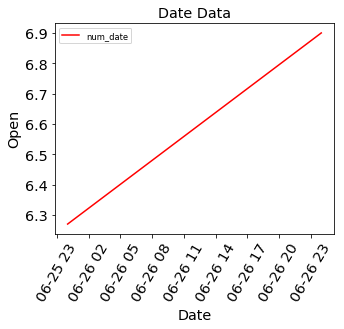

In [163]:
IMGN_e1['num_date'] = pd.to_datetime(IMGN_event_1['date'])
IMGN_e1['num_date'] = IMGN_e1['num_date'].map(dt.datetime.toordinal)
m, b = np.polyfit(IMGN_e1['num_date'], IMGN_e1['open'], 1)
plt.plot(IMGN_e1['date'], m*(IMGN_e1['num_date']) + b, '-', color = "red")

plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["legend.fontsize"] = 'small'

plt.title('Date Data')
plt.xlabel("Date")
plt.ylabel("Open")
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [164]:
print(m)

0.630000000074


It looks like the open prices for the stock on this specific day went up 63%! We don't know if that means that for *every* event the company releases, that will happen, so why don't we test it out with some python? Let's calculate all these increase in values, put them into a list, and see if they all have significant increases immediately following a big event for the company.

In [200]:
from statistics import mean

IMGN2 = IMGN.copy()
IMGN2['num_date'] = pd.to_datetime(IMGN2['date'])
IMGN2['num_date'] = IMGN2['num_date'].map(dt.datetime.toordinal)

IMGN_e = IMGN_events.copy()
IMGN_e['num_date'] = pd.to_datetime(IMGN_e['date'])
IMGN_e['num_date'] = IMGN_e['num_date'].map(dt.datetime.toordinal)

IMGN_avg_high = []
IMGN_avg_low = []
IMGN_avg_open = []
for row, col in IMGN_e.iterrows():
    # finding the dates
    date1 = pd.to_datetime(col['date'])
    date2 = date1 - dt.timedelta(days=3)
    
    # getting info from regular graph
    event = IMGN2[IMGN2['date'] <= str(date1)]
    event = event[event['date'] >= str(date2)]
    #print(event)
    
    m, b = np.polyfit(event['num_date'], event['high'], 1)
    IMGN_avg_high.append(m)
    
    m, b = np.polyfit(event['num_date'], event['low'], 1)
    IMGN_avg_low.append(m)
    
    m, b = np.polyfit(event['num_date'], event['open'], 1)
    IMGN_avg_open.append(m)

In [201]:
IMMU2 = IMMU.copy()
IMMU2['num_date'] = pd.to_datetime(IMMU2['date'])
IMMU2['num_date'] = IMMU2['num_date'].map(dt.datetime.toordinal)

IMMU_e = IMMU_events.copy()
IMMU_e['num_date'] = pd.to_datetime(IMMU_e['date'])
IMMU_e['num_date'] = IMMU_e['num_date'].map(dt.datetime.toordinal)

IMMU_avg_high = []
IMMU_avg_low = []
IMMU_avg_open = []
for row, col in IMMU_e.iterrows():
    # finding the dates
    date1 = pd.to_datetime(col['date'])
    date2 = date1 - dt.timedelta(days=3)
    
    # getting info from regular graph
    event = IMMU2[IMMU2['date'] <= str(date1)]
    event = event[event['date'] >= str(date2)]
    #print(event)
    
    m, b = np.polyfit(event['num_date'], event['high'], 1)
    IMMU_avg_high.append(m)
    
    m, b = np.polyfit(event['num_date'], event['low'], 1)
    IMMU_avg_low.append(m)
    
    m, b = np.polyfit(event['num_date'], event['open'], 1)
    IMMU_avg_open.append(m)

In [203]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)

EXEL2 = EXEL.copy()
EXEL2['num_date'] = pd.to_datetime(EXEL2['date'])
EXEL2['num_date'] = EXEL2['num_date'].map(dt.datetime.toordinal)

EXEL_e = EXEL_events.copy()
EXEL_e['num_date'] = pd.to_datetime(EXEL_e['date'])
EXEL_e['num_date'] = EXEL_e['num_date'].map(dt.datetime.toordinal)

EXEL_avg_high = []
EXEL_avg_low = []
EXEL_avg_open = []
for row, col in EXEL_e.iterrows():
    # finding the dates
    date1 = pd.to_datetime(col['date'])
    date2 = date1 - dt.timedelta(days=3)
    
    # getting info from regular graph
    event = EXEL2[EXEL2['date'] <= str(date1)]
    event = event[event['date'] >= str(date2)]
    #print(event)
    
    m, b = np.polyfit(event['num_date'], event['high'], 1)
    EXEL_avg_high.append(m)
    
    m, b = np.polyfit(event['num_date'], event['low'], 1)
    EXEL_avg_low.append(m)
    
    m, b = np.polyfit(event['num_date'], event['open'], 1)
    EXEL_avg_open.append(m)

In [204]:
INO2 = INO.copy()
INO2['num_date'] = pd.to_datetime(INO2['date'])
INO2['num_date'] = INO2['num_date'].map(dt.datetime.toordinal)

INO_e = INO_events.copy()
INO_e['num_date'] = pd.to_datetime(INO_e['date'])
INO_e['num_date'] = INO_e['num_date'].map(dt.datetime.toordinal)

INO_avg_high = []
INO_avg_low = []
INO_avg_open = []
for row, col in INO_e.iterrows():
    # finding the dates
    date1 = pd.to_datetime(col['date'])
    date2 = date1 - dt.timedelta(days=3)
    
    # getting info from regular graph
    event = INO2[INO2['date'] >= str(date2)]
    event = event[event['date'] <= str(date1)]
    # print(event)
    # had to check whether the date was in the set, because the stock was only just released.
    if not event.empty:
        m, b = np.polyfit(event['num_date'], event['high'], 1)
        INO_avg_high.append(m)
        
        m, b = np.polyfit(event['num_date'], event['low'], 1)
        INO_avg_low.append(m)
        
        m, b = np.polyfit(event['num_date'], event['open'], 1)
        INO_avg_open.append(m)

So, altogether, let's see what the stock price high data average is for each company, and see if it makes sense to conclude that that would be the best time to invest.

In [207]:
print("IMGN High: " + str(mean(IMGN_avg_high)))
print("IMGN Low:  " + str(mean(IMGN_avg_low)))
print("IMGN Open: " + str(mean(IMGN_avg_open)))
print('\n')

print("IMMU High: " + str(mean(IMMU_avg_high)))
print("IMMU Low:  " + str(mean(IMMU_avg_low)))
print("IMMU Open: " + str(mean(IMMU_avg_open)))
print('\n')

print("EXEL High: " + str(mean(EXEL_avg_high)))
print("EXEL Low:  " + str(mean(EXEL_avg_low)))
print("EXEL Open: " + str(mean(EXEL_avg_open)))
print('\n')

print("INO High:  " + str(mean(INO_avg_high)))
print("INO Low:   " + str(mean(INO_avg_low)))
print("INO Open:  " + str(mean(INO_avg_open)))
print('\n')

IMGN High: 0.102156666663
IMGN Low:  -0.0170716666667
IMGN Open: 0.0880000000051


IMMU High: 0.0772099999909
IMMU Low:  0.00702666666749
IMMU Open: -0.0509666666528


EXEL High: 0.126886948113
EXEL Low:  -0.0237330593846
EXEL Open: -0.0722330573308


INO High:  0.264572962958
INO Low:   0.173739629623
INO Open:  0.291259259253




Because most of the data that we collected did not show a definite positive trend for all its events (as some were decreasing and some were increasing), we cannot safely say that waiting around for company events to occur will be a good way to make quick money. Relying on the release of phases or conferences or papers from these companies will not benefit you much. For some of the companies, like INO, it looks like their events might bring people some dough from selling stock in. However, we cannot say this for all companies. Let's look a little bit more into what days are like for the stocks. We will now use more data, but in a shorter time frame, and analyze what best time of day it is to buy and sell stock, seeing as best time of year with regards to events did not work out so well. 

# Bigger Data Set

# Analyzing our Bigger Data Set

# Final Conclusions

## Helpful Links
- [Pandas Tutorial] [pandatutorial]
- [MatPlotLib Tutorial] [plottutorial]
- [Datetime Tutorial] [timetutorial]

[pandatutorial]: https://pandas.pydata.org/pandas-docs/stable/tutorials.html
[plottutorial]: https://matplotlib.org/2.0.2/users/pyplot_tutorial.html
[timetutorial]: http://effbot.org/librarybook/datetime.htm